# Практическая работа №10

## Задание 1

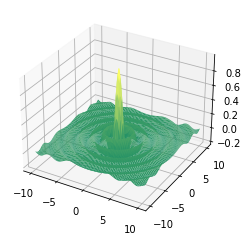

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

x,y = np.linspace(-10,10,400), np.linspace(-10,10,400)
X,Y = np.meshgrid(x,y)

f = np.sinc(np.hypot(X,Y))

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,f, rstride=5, cstride=5,cmap=cm.summer)
plt.show()

## Задание 2

<ipython-input-11-7625255f5342>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dt = np.dtype([('month',np.int),('day',np.int),('n',np.float)])
<ipython-input-11-7625255f5342>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecation

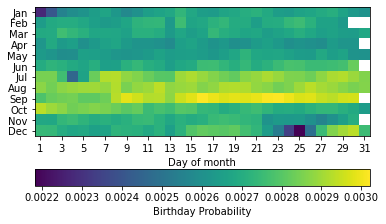

In [11]:
import numpy as np
import matplotlib.pyplot as plt

dt = np.dtype([('month',np.int),('day',np.int),('n',np.float)])
data = np.genfromtxt('birthday-data.csv', dtype=dt,delimiter=',', skip_header=1)

total = np.sum(data['n'])
heatmap = np.empty((12,31))
heatmap[:] = np.nan

mdpm = np.array([31,29,31,30,31,30,31,31,30,31,30,31])
for month, day, n in data:
    imonth, iday = month - 1, day - 1
    if day > mdpm[imonth]:
        continue
    heatmap[imonth,iday] = n/total
heatmap[1,28] *= 4

fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.imshow(heatmap, interpolation='nearest')
ax.set_yticks(range(12))
ax.set_yticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
days = np.array(range(0,31,2))
ax.set_xticks(days)
ax.set_xticklabels(['{:d}'.format(day+1) for day in days])
ax.set_xlabel('Day of month')

cbar = fig.colorbar(ax=ax, mappable=im, orientation='horizontal')
cbar.set_label('Birthday Probability')

plt.show()